In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize


In [43]:
df=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/train_E6oV3lV.csv',index_col=False)
df1=df.copy()
df2=df.copy()

In [44]:
dfneg=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/NegWords.csv')
dftest=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/test_tweets_anuFYb8.csv',index_col=False)


In [45]:
pos=df1[df1['label']==0]
neg=df2[df2['label']==1]


Positive words


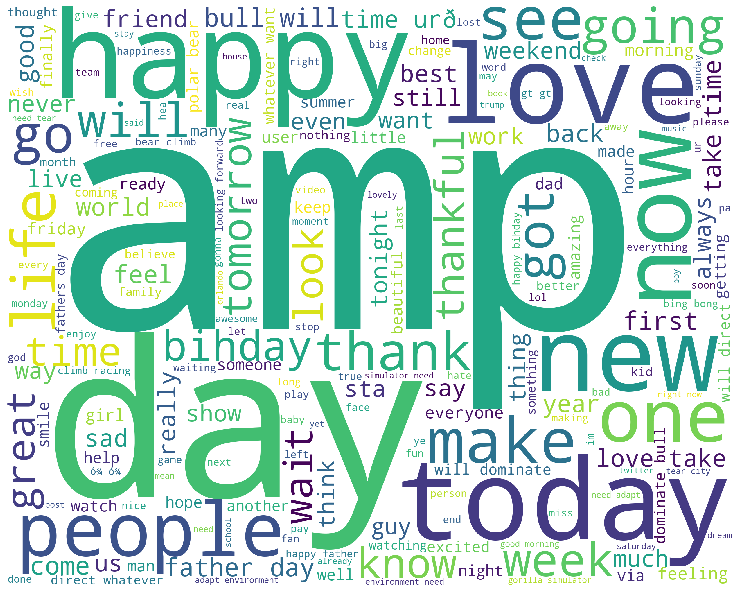

Negative words


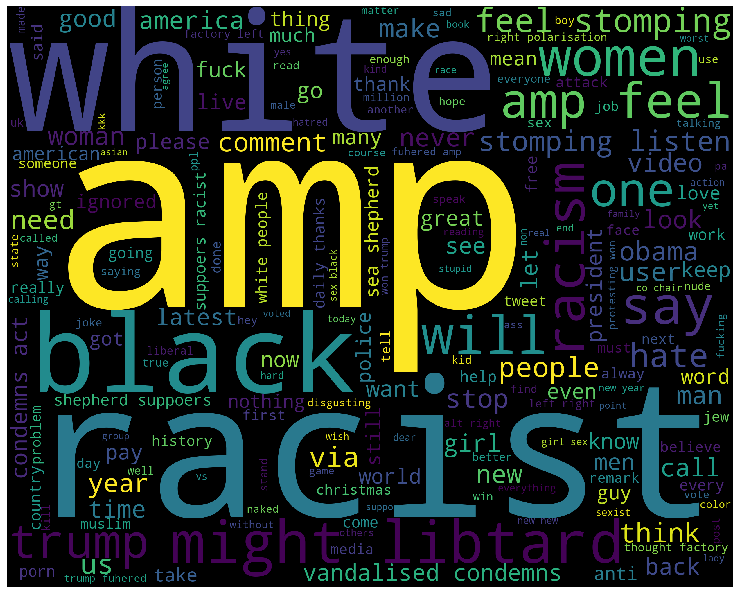

In [228]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos['tweet'],'white')
print("Negative words")
wordcloud_draw(neg['tweet'])

In [46]:
def words(tweets):
    l=[]
    for tweet in tweets:
        l.extend(str(tweet).split())
    return l

In [47]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(words(df['tweet']))

In [48]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features


In [49]:
dfword=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/words.csv')
d=dfword.head(4)
dn=dfword.tail(4)

In [149]:

plt.scatter(dfword['Words'],dfword['sentiment'])

Error in callback <function flush_figures at 0x000002DB763AF2F0> (for post_execute):


KeyboardInterrupt: 

#https://www.speckbit.com/roadmap/data-wrangling/5/1


In [100]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    
    return input_txt

In [148]:
df['cleaned_tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\\w]*")
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")
df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = df['cleaned_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [149]:
type(tokenized_tweet)


pandas.core.series.Series

In [150]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dfword['sentiment']=le.fit_transform(dfword['sentiment'])

#dfword['Words']=le.fit_transform(dfword['Words'])

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(dfword['Words'])
# printing all the words 
print(vectorizer.vocabulary_)
# encoding the document
vector = vectorizer.transform(dfword['Words'])
# summary of the encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'faced': 2244, 'faces': 2245, 'abnormal': 1, 'abolish': 2, 'abominable': 3, 'abominably': 4, 'abominate': 5, 'abomination': 6, 'abort': 7, 'aborted': 8, 'aborts': 9, 'abrade': 12, 'abrasive': 13, 'abrupt': 14, 'abruptly': 15, 'abscond': 16, 'absence': 17, 'absent': 18, 'minded': 4066, 'absentee': 19, 'absurd': 20, 'absurdity': 21, 'absurdly': 22, 'absurdness': 23, 'abuse': 26, 'abused': 27, 'abuses': 28, 'abusive': 29, 'abysmal': 30, 'abysmally': 31, 'abyss': 32, 'accidental': 35, 'accost': 47, 'accursed': 50, 'accusation': 51, 'accusations': 52, 'accuse': 53, 'accuses': 54, 'accusing': 55, 'accusingly': 56, 'acerbate': 57, 'acerbic': 58, 'acerbically': 59, 'ache': 60, 'ached': 61, 'aches': 62, 'achey': 63, 'aching': 68, 'acrid': 69, 'acridly': 70, 'acridness': 71, 'acrimonious': 72, 'acrimoniously': 73, 'acrimony': 74, 'adamant': 77, 'adamantly': 78, 'addict': 81, 'addicted': 82, 'addicting': 83, 'addicts': 84, 'admonish': 94, 'admonisher': 95, 'admonishingly': 96, 'admonishment': 97

In [152]:


from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(dfword['Words'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(dfword['Words'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'faced': 2244, 'faces': 2245, 'abnormal': 1, 'abolish': 2, 'abominable': 3, 'abominably': 4, 'abominate': 5, 'abomination': 6, 'abort': 7, 'aborted': 8, 'aborts': 9, 'abrade': 12, 'abrasive': 13, 'abrupt': 14, 'abruptly': 15, 'abscond': 16, 'absence': 17, 'absent': 18, 'minded': 4066, 'absentee': 19, 'absurd': 20, 'absurdity': 21, 'absurdly': 22, 'absurdness': 23, 'abuse': 26, 'abused': 27, 'abuses': 28, 'abusive': 29, 'abysmal': 30, 'abysmally': 31, 'abyss': 32, 'accidental': 35, 'accost': 47, 'accursed': 50, 'accusation': 51, 'accusations': 52, 'accuse': 53, 'accuses': 54, 'accusing': 55, 'accusingly': 56, 'acerbate': 57, 'acerbic': 58, 'acerbically': 59, 'ache': 60, 'ached': 61, 'aches': 62, 'achey': 63, 'aching': 68, 'acrid': 69, 'acridly': 70, 'acridness': 71, 'acrimonious': 72, 'acrimoniously': 73, 'acrimony': 74, 'adamant': 77, 'adamantly': 78, 'addict': 81, 'addicted': 82, 'addicting': 83, 'addicts': 84, 'admonish': 94, 'admonisher': 95, 'admonishingly': 96, 'admonishment': 97

In [153]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(dfword['Words'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray()) 

(7076, 20)
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [154]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
fm=dfword.iloc[:,1:2]
tv=dfword['sentiment']
print(fm.shape)

print(tv.shape)

(7076, 1)
(7076,)


In [155]:
model.fit(X=fm,y=tv)

c:\users\richu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
model.predict([[1]])

array([1], dtype=int64)

In [157]:
for i in tokenized_tweet:
    vector = vectorizer.transform(i)
    fm=[i]
    vector.reshape(-1,1)
    print(vector.shape)
    print(vector.toarray())


(9, 20)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(10, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

(10, 20)
[[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(8, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

(8, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.]]
(9, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

(5, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(8, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

[[ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(7, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0

(5, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.  0.]]
(2, 20)
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(11, 20)
[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 

(10, 20)
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]
(9, 20)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  

ValueError: Cannot vectorize empty sequence.

In [160]:
for i in df['cleaned_tweets']:
    fm=[[i]]
    data=model.predict(fm)
    

c:\users\richu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

array([0])

NameError: name 'cleaned_tweet' is not defined

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

,tf_idf_weights
ill,6.672312
anti,7.020619
self,7.202940
over,7.559615
hard,7.713766
down,7.713766
out,7.896087
up,7.896087
rip,8.119231
lame,8.119231


,tfidf
abnormal,0.0
pale,0.0
painfully,0.0
painfull,0.0
painful,0.0
pain,0.0
overzelous,0.0
overzealously,0.0
overzealous,0.0
overwhelms,0.0
